In [1]:
import tensorflow as tf
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2
from utils.layers import Sequential, Zip, Parallel, Linear

In [ ]:
path = 'logs/optimizer=adam,learning_rate=0.001,latent_dim=50,MH=10,batch_size=512,update_sampler_every=1,leapfrogs=10/model.ckpt.meta'

# with tf.gfile.Open(path):
#     tf.reset_default_graph()
#     tf.train.import_meta_graph(path)

In [4]:
with tf.variable_scope('decoder'):
    decoder = Sequential([
        Linear(50, 1024, scope='decoder_1'),
        tf.nn.softplus,
        Linear(1024, 1024, scope='decoder_2'),
        tf.nn.softplus,
        Linear(1024, 784, scope='decoder_3', factor=0.01)
    ])

In [5]:
saver = tf.train.Saver()

sess = tf.Session()

In [6]:
saver.restore(save_path='logs/optimizer=adam,learning_rate=0.001,latent_dim=50,MH=10,batch_size=512,update_sampler_every=1,leapfrogs=10/model.ckpt',
             sess=sess)

INFO:tensorflow:Restoring parameters from logs/optimizer=adam,learning_rate=0.001,latent_dim=50,MH=10,batch_size=512,update_sampler_every=1,leapfrogs=10/model.ckpt


In [8]:
z_eval = tf.random_normal((64, 50))
x_eval = tf.nn.sigmoid(decoder(z_eval))

In [9]:
def plot_grid(S, width=8):
    sheet_width = width
    plt.figure(figsize=(8, 8))
    for i in xrange(S.shape[0]):
        plt.subplot(sheet_width, sheet_width, i + 1)
        plt.imshow(S[i], cmap='grey')
        plt.grid('off')
        plt.axis('off')

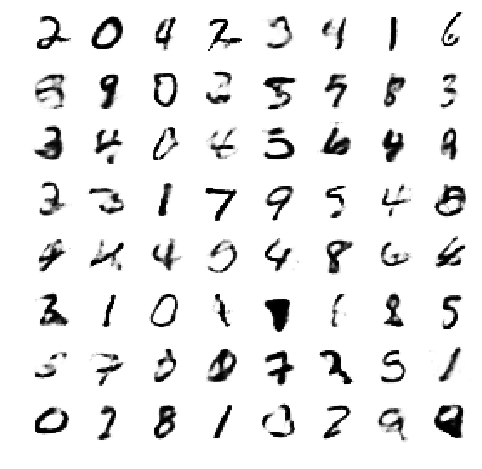

In [11]:
S = sess.run(x_eval)
S = np.reshape(S, (-1, 28, 28))

plot_grid(1-S)

In [3]:
x1 = tf.placeholder(tf.float32, shape=(None, 5))
x2 = tf.placeholder(tf.float32, shape=(None, 5))

dum = (tf.random_uniform((tf.shape(x1)[0],), maxval=2, dtype=tf.int32))
bool_mask = tf.cast(dum, dtype=tf.bool)
float_mask = tf.cast(dum, dtype=tf.float32)

op1 = x1 * float_mask + x2 * (1-float_mask)
op2 = tf.where(bool_mask, x1, x2)

In [4]:

import time

In [47]:
with tf.Session() as sess:
    sess.run([op1, op2], {x1: np.eye(5,), x2: 5 * np.eye(5,)})
    
    time0 = time.time()
    
    [sess.run(op1, {x1: np.eye(5,), x2: 5 * np.eye(5,)}) for t in range(1000)]
    
    time1 = time.time()
    
    [sess.run(op2, {x1: np.eye(5,), x2: 5 * np.eye(5,)}) for t in range(1000)]
    
    time2 = time.time()

In [48]:
print time2-time1

0.536671876907


In [51]:
n=10

In [52]:
ind = np.random.permutation(np.arange(n))[:n / 2]

In [58]:
mask_per_step = []

for t in range(20):
    ind = np.random.permutation(np.arange(n))[:int(n/2)]
    m = np.zeros((n,))
    m[ind] = 1
    mask_per_step.append(m)

mask = tf.constant(np.stack(mask_per_step), dtype=tf.float32)

In [60]:
np.stack(mask_per_step).shape

(20, 10)

In [61]:
def get_mask(step):
    return tf.gather(mask, tf.cast(step, dtype=tf.int32))

In [70]:
def body_f(array, t,):
    array = array.write(tf.cast(t, tf.int32), get_mask(t))
    return array, t+1

def body_b(array, t):
    array = array.write(tf.cast(t, tf.int32), get_mask(20 - t -1))
    return array, t+1

def cond(_, t):
    return tf.less(t, 20)

array1 = tf.while_loop(body=body_f, cond=cond, loop_vars=(tf.TensorArray(tf.float32, size=20), tf.constant(0.)))[0]
array2 = tf.while_loop(body=body_b, cond=cond, loop_vars=(tf.TensorArray(tf.float32, size=20), tf.constant(0.)))[0]


In [71]:
with tf.Session() as sess:
    a1, a2 = sess.run([array1.stack(), array2.stack()])

In [75]:
for i, m in enumerate(reversed(mask_per_step)):
    print m-a2[i]

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [ ]:
  def forward(self, x, init_v=None, aux=None, log_path=False):
    if init_v is None:
      v = tf.random_normal(tf.shape(x))
    else:
      v = init_v

    dN = tf.shape(x)[0]
    t = tf.constant(0.)
    j = tf.zeros((dN,))
    
#     curr_x, curr_v = x, v
    
#     log_jac = 0.
    
#     for t in range(self.T):
#       curr_x, curr_v, log_j = self._forward_step(curr_x, curr_v, t, aux=aux)
#       log_jac += log_j
    
#     return curr_x, curr_v, self.p_accept(x, v, curr_x, curr_v
    def body(x, v, t, j):
      #array = array.write(tf.cast(t, tf.int32), x)
      new_x, new_v, log_j = self._forward_step(x, v, t, aux=aux)
      return new_x, new_v, t+1, j+log_j

    def cond(x, v, t, j):
      return tf.less(t, self.T)

    # X, V, t, log_jac, array = tf.while_loop(cond=cond, body=body, loop_vars=[x, v, t, j, tf.TensorArray(tf.float32, size=self.T)])
    X, V, t, log_jac = tf.while_loop(
        cond=cond,
        body=body,
        loop_vars=[x, v, t, j]
    )